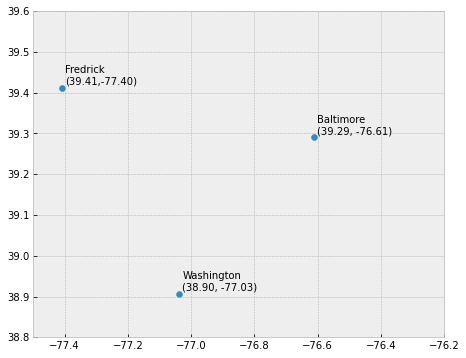

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
plt.style.use('bmh') # better for plotting geometries vs general plots.


d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


<AxesSubplot:>

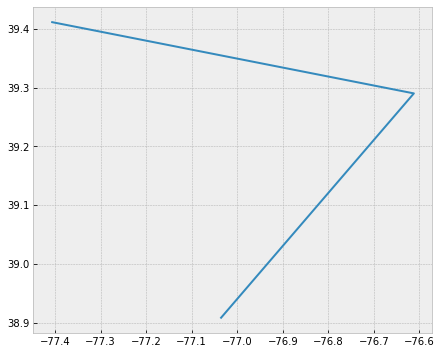

In [3]:

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,LineString
plt.style.use('bmh') # better for plotting geometries vs general plots.

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)


<AxesSubplot:>

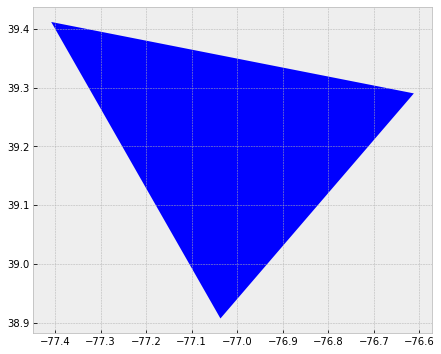

In [2]:
from shapely.geometry import Polygon

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)

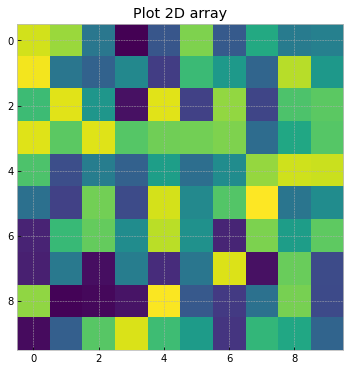

In [4]:
import numpy as np

X=np.random.randint(256, size=(10, 10))

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()


In [ ]:
import geopandas
l= geopandas.GeoSeries([LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])])
l

In [5]:
from shapely.geometry import Polygon
p= geopandas.GeoSeries([Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])])
p

NameError: name 'geopandas' is not defined

In [ ]:
geopandas.datasets.available

In [ ]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities.head()

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.cx 

In [10]:
import pandas
name = 'fudge'
name[0:3]

'fud'

<AxesSubplot:>

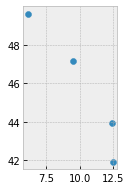

In [11]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.iloc[ 0:4 ]    
northern_world.plot(figsize=(10, 3))  


NameError: name 'plot' is not defined

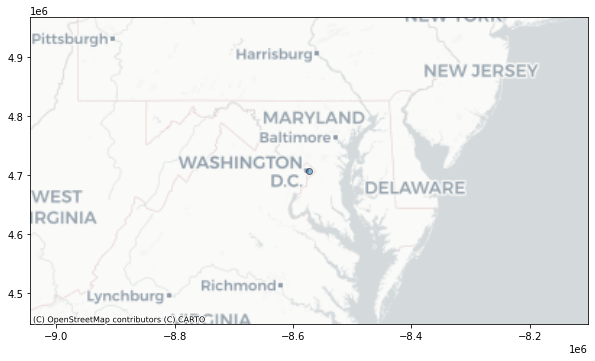

In [48]:
import geopandas
import contextily as ctx
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities = cities[cities.name == 'Washington, D.C.']
cities = cities.to_crs(epsg=3857) # project to webmercator

ax = cities.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron,zoom = 6, reset_extent = True)
# ctx.add_basemap(ax, url=ctx.providers.Stamen.Toner,zoom = 6, reset_extent = True)


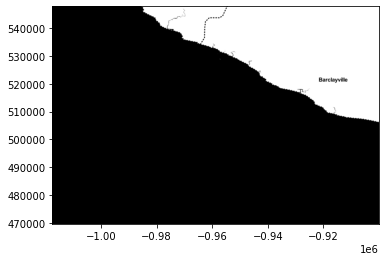

In [40]:
import matplotlib.pyplot as plt
ghent_img, ghent_ext = ctx.bounds2img(w=-8.8,
                                     s=4.5,
                                     e=-8.4,
                                     n=4.9,
                                     ll=True,
                                     source=ctx.providers.Stamen.Toner,
                                     zoom=10,
                                    )
plt.imshow(ghent_img, extent=ghent_ext)


Empty GeoDataFrame
Columns: [geometry]
Index: []


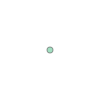

In [1]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

print(newdata)


# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = (-77.04639494419096,  38.89934963421794)

# Create a Shapely polygon from the coordinate-tuple list
point = Point(coordinates)

# Let's see what we have
point

In [9]:
import pandas as pd
import geopandas
points = {'lon': [-77.0412826538086, -77.11681365966797, -77.01896667480469, -77.0412826538086], 
          'lat': [38.99570671505043, 38.936713143230044, 38.807610542357594, 38.99570671505043]}
points = pd.DataFrame.from_dict(points)
points.to_csv('~/temp/points.csv')              


In [3]:
path_to_csv = '~/temp/points.csv'
from fiona.crs import from_epsg

from geopandas import GeoDataFrame as gdf
df = pd.read_csv(path_to_csv)

# Create a geodataframe from the data using from_epsg to assign WGS84 coordinate reference system
points= gdf(df, geometry=geopandas.points_from_xy(x=points.lon, y=points.lat), crs = from_epsg(4326))
points

/home/mmann1123/anaconda3/envs/pygisbook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,lon,lat,geometry
0,0,-77.041283,38.995707,POINT (-77.04128 38.99571)
1,1,-77.116814,38.936713,POINT (-77.11681 38.93671)
2,2,-77.018967,38.807611,POINT (-77.01897 38.80761)
3,3,-77.041283,38.995707,POINT (-77.04128 38.99571)


In [4]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

print(newdata)

# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = (-77.04639494419096,  38.89934963421794)

# Create a Shapely polygon from the coordinate-tuple list
point = Point(coordinates)

# Let's see what we have
point

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = point

# Let's see what we have now
newdata

# Add a new column and insert data
newdata.loc[0, 'Location'] = 'GWU Geography'

# Let's check the data
newdata

# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(code = 4326)

# Let's see how the crs definition looks like
newdata.crs

# Determine the output path for the Shapefile
outfp = r"../temp/gwu_geog.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)


Empty GeoDataFrame
Columns: [geometry]
Index: []
/home/mmann1123/anaconda3/envs/pygisbook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
for x,y in [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
            [ -76.90910339355469,  38.892636142310295]]:
            print(x,y)

-77.0412826538086 38.99570671505043
-77.11681365966797 38.936713143230044
-77.01896667480469 38.807610542357594
-76.90910339355469 38.892636142310295


In [6]:
coord_list = [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
            [ -76.90910339355469,  38.892636142310295]]
[(x,y) for x,y in coord_list]

[(-77.0412826538086, 38.99570671505043),
 (-77.11681365966797, 38.936713143230044),
 (-77.01896667480469, 38.807610542357594),
 (-76.90910339355469, 38.892636142310295)]

In [7]:
from io import StringIO 
data = """
ID,X,Y,Speed
1,  -87.78976,  41.97658,   16
1,  -87.48234,  41.677342,  17
2,  -87.73956,  41.876827,  16
2,  -87.68161,  41.79886,   16
2,  -87.5999,   41.7083,    16
3,  -87.59918,  41.908485,  17
3,  -87.59857,  41.708393,  17
3,  -87.64391,  41.675133,  17
"""

df = pd.read_table(StringIO(data),sep=',')
print(df.columns)
df


Index(['ID', 'X', 'Y', 'Speed'], dtype='object')


,ID,X,Y,Speed
0,1,-87.78976,41.976580,16
1,1,-87.48234,41.677342,17
2,2,-87.73956,41.876827,16
3,2,-87.68161,41.798860,16
4,2,-87.59990,41.708300,16
5,3,-87.59918,41.908485,17
6,3,-87.59857,41.708393,17
7,3,-87.64391,41.675133,17


<AxesSubplot:>

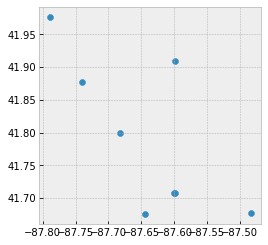

In [8]:


import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, shape

import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

#zip the coordinates into a point object and convert to a GeoData Frame
geometry = [Point(xy) for xy in zip(df.X, df.Y)]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.plot()

<AxesSubplot:>

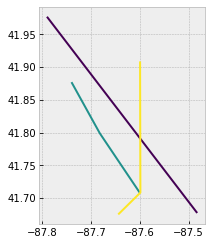

In [21]:

geo_df2 = geo_df.groupby(['ID'])['geometry'].apply(lambda x:  LineString(x.tolist()))
geo_df2 = gpd.GeoDataFrame(geo_df2, geometry='geometry', crs="EPSG:4326")
geo_df2.reset_index(inplace=True)
geo_df2.plot(column='ID')

ID
1     LINESTRING (-87.78976 41.97658, -87.4823399999...
2     LINESTRING (-87.73956 41.876827, -87.681610000...
3     LINESTRING (-87.59918 41.708485, -87.59857 41....
ID      Int64Index([1, 2, 3], dtype='int64', name='ID')
Name: geometry, dtype: object

<AxesSubplot:>

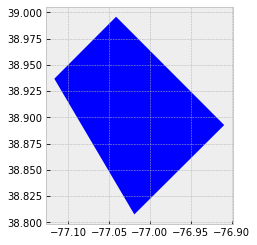

In [25]:
# list of coordindate pairs
coordinates = [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
               [-76.90910339355469,  38.892636142310295]]           

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# create a dataframe with needed attributes and required geometry column
df = {'GWU': ['name1'], 'geometry': poly}

# Convert shapely object to a geodataframe 
poly = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
poly.plot()


<AxesSubplot:>

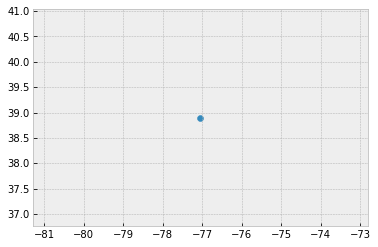

In [43]:

# Coordinates of the GW department of geography in Decimal Degrees
coordinate = [-77.04639494419096,  38.89934963421794]

# Create a Shapely polygon from the coordinate-tuple list
point_coord = Point(coordinate)

# create a dataframe with needed attributes and required geometry column
df = {'GWU': ['Dept Geography'], 'geometry': [point_coord]}

# Convert shapely object to a geodataframe 
point = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
point.plot()

In [16]:
points = [Point(xy) for xy in zip(df.X, df.Y)]
geo_df = gpd.GeoDataFrame(df, geometry=points, crs = from_epsg(4326))


# list of coordindate pairs
coordinates = [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
               [ -76.90910339355469,  38.892636142310295]]           

# Create a Shapely polygon from the coordinate-tuple list
ply_coord = Polygon(coordinates)

# create a dataframe with needed attributes and required geometry column
df = {'Attribute': ['name1'], 'geometry': ply_coord}

# Convert shapely object to a geodataframe 
poly = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
poly.plot()

,geometry
0,POINT (-77.04128 38.99571)
1,POINT (-77.11681 38.93671)
2,POINT (-77.01897 38.80761)
3,POINT (-76.90910 38.89264)


In [2]:
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [38]:
import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

array([[-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.]])

In [39]:
Y

array([[ 90.,  90.,  90.,  90.,  90.,  90.],
       [ 54.,  54.,  54.,  54.,  54.,  54.],
       [ 18.,  18.,  18.,  18.,  18.,  18.],
       [-18., -18., -18., -18., -18., -18.],
       [-54., -54., -54., -54., -54., -54.],
       [-90., -90., -90., -90., -90., -90.]])

In [40]:
Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)
Z

array([[13776.  ,  8586.24,  5573.76,  4738.56,  6080.64,  9600.  ],
       [10256.64,  5066.88,  2054.4 ,  1219.2 ,  2561.28,  6080.64],
       [ 8914.56,  3724.8 ,   712.32,  -122.88,  1219.2 ,  4738.56],
       [ 9749.76,  4560.  ,  1547.52,   712.32,  2054.4 ,  5573.76],
       [12762.24,  7572.48,  4560.  ,  3724.8 ,  5066.88,  8586.24],
       [17952.  , 12762.24,  9749.76,  8914.56, 10256.64, 13776.  ]])

In [41]:
X=np.random.randint(256, size=(10, 10))
plt.imshow(Z)
plt.title("Plot 2D array")
plt.show()

NameError: name 'plt' is not defined

In [42]:
from rasterio.transform import Affine
xres = (x[-1] - x[0]) / len(x)
yres = (y[-1] - y[0]) / len(y)
print(Affine.translation(x[0] - xres / 2, y[0] - yres / 2))
transform = Affine.translation(x[0] - xres / 2, y[0] - yres / 2) * Affine.scale(xres, yres)
print('--------------')
print(Affine.scale(xres, yres))
print('--------------')
print(transform)

| 1.00, 0.00,-105.00|
| 0.00, 1.00, 105.00|
| 0.00, 0.00, 1.00|
--------------
| 30.00, 0.00, 0.00|
| 0.00,-30.00, 0.00|
| 0.00, 0.00, 1.00|
--------------
| 30.00, 0.00,-105.00|
| 0.00,-30.00, 105.00|
| 0.00, 0.00, 1.00|


In [43]:
xres

30.0

In [44]:
transform*(0,0)


(-105.0, 105.0)

In [51]:
transform*(3,3)



(-15.0, 15.0)

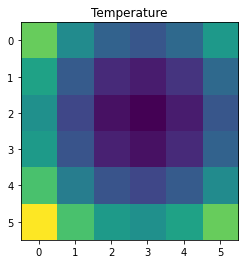

In [3]:
import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

Y

import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()



In [11]:
from rasterio.transform import Affine

xres = (x[-1] - x[0]) / len(x)
yres = (y[-1] - y[0]) / len(y)

transform = Affine.translation(x[0] - xres / 2, y[0] - yres / 2) * Affine.scale(xres, yres)





In [20]:

new_dataset = rasterio.open(
                fp = '~/temp/temperature.tif',
                mode= 'w',
                driver='GTiff',
                height=Z.shape[0],
                width=Z.shape[1],
                count=1,
                dtype=Z.dtype,
                crs='+proj=latlong',
                transform=transform,
)


IndexError: tuple index out of range

In [14]:
Z.dtype

dtype('float64')

$$
   \begin{eqnarray}
    \left[ \begin{array}{cc|r} \acute{x} \\ \acute{y} \end{array} \right] =
    \left[ \begin{array}{cc|r} ax+by \\ dx+ey \end{array} \right]  =
    \left[ \begin{array}{cc|r} a \ \ b \\ d \ \ e \end{array} \right] \left[ \begin{array}{cc|r} x \\ y \end{array} \right] 
     
   \end{eqnarray}
$$